#Library dan Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import csv
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report

In [ ]:
# Memuat dataset
data = pd.read_csv('clean-data-.csv', sep=';')

#Eksplorasi Dataset

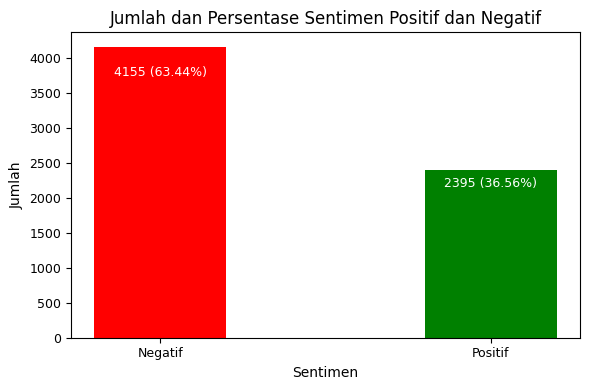

In [ ]:
# Eksplorasi Dataset

s_1 = data[data["labels"] == 'negatif']
s_2 = data[data["labels"] == 'positif']

# Menghitung jumlah dan persentase sentimen
sentiment_counts = pd.DataFrame({
    "Sentimen": ["Negatif", "Positif"],
    "Jumlah": [len(s_1), len(s_2)]})
sentiment_counts["Persentase"] = (sentiment_counts["Jumlah"] / sentiment_counts["Jumlah"].sum()) * 100

# Membuat plot batang
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts["Sentimen"], sentiment_counts["Jumlah"], color=["red", "green"], width=0.4)
plt.title("Jumlah dan Persentase Sentimen Positif dan Negatif", fontsize=12)
plt.xlabel("Sentimen", fontsize=10)
plt.ylabel("Jumlah", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Menampilkan jumlah per sentimen dan persentase di atas batang dengan posisi yang sesuai
for i, row in sentiment_counts.iterrows():
    plt.text(i, row["Jumlah"] - row["Jumlah"] * 0.1, f"{row['Jumlah']} ({row['Persentase']:.2f}%)", ha='center', fontsize=9, color='white')

# Menampilkan plot
plt.tight_layout()
plt.show()

#Pembobotan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

ulasan = data['preproses']
labels = data['labels']

# Inisialisasi TfidfVectorizer
tfidf_vect = TfidfVectorizer(smooth_idf=True)
tfidf_vect.fit(ulasan)
tfidf_mat = tfidf_vect.transform(ulasan)

print(tfidf_mat)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 55178 stored elements and shape (6550, 6056)>
  Coords	Values
  (0, 18)	0.2571322442329877
  (0, 164)	0.20448465781376113
  (0, 442)	0.13951061859462058
  (0, 894)	0.5341738109222596
  (0, 1111)	0.19308946020311574
  (0, 1438)	0.10297574437140924
  (0, 2906)	0.19905006858571536
  (0, 4093)	0.34416515539191905
  (0, 4199)	0.3167093287968635
  (0, 4855)	0.24465176270964775
  (0, 4963)	0.2754569399882823
  (0, 5040)	0.2335251111098062
  (0, 5483)	0.2892535022018079
  (0, 5568)	0.0840753077417493
  (1, 1886)	0.4730116967111059
  (1, 3096)	0.36913763377695774
  (1, 3575)	0.2834463369396584
  (1, 4990)	0.5805478241839048
  (1, 5423)	0.320512143126847
  (1, 5436)	0.3462538174852207
  (2, 952)	0.30434275642960273
  (2, 1292)	0.4953827435258625
  (2, 2553)	0.2372294392314859
  (2, 3584)	0.5205040700092738
  (2, 5097)	0.5634492612863917
  :	:
  (6547, 4749)	0.1959736663791212
  (6547, 5114)	0.14976947607023766
  (6547, 5568)	0.0910803

In [ ]:
# Melihat kosakata yang dipelajari oleh TfidfVectorizer
vocabulary = tfidf_vect.vocabulary_
print(vocabulary)

{'bagus': 442, 'si': 5040, 'sayang': 4855, 'tempat': 5483, 'driver': 1438, 'abis': 18, 'ambil': 164, 'sen': 4963, 'tidak': 5568, 'langsung': 2906, 'otw': 4093, 'pdahal': 4199, 'customer': 1111, 'buru': 894, 'serba': 4990, 'mahal': 3096, 'tarif': 5423, 'tawar': 5436, 'murah': 3575, 'hadeh': 1886, 'kenapa': 2553, 'cari': 952, 'singnal': 5097, 'mutar': 3584, 'diem': 1292, 'mantap': 3196, 'very': 5909, 'good': 1821, 'bersih': 661, 'harum': 1948, 'tuju': 5736, 'bisa': 724, 'buka': 874, 'hasil': 1951, 'kejar': 2511, 'waktu': 5943, 'sistem': 5114, 'terima': 5512, 'order': 4058, 'baik': 459, 'admin': 40, 'ok': 3983, 'kasih': 2454, 'bintang': 718, 'susah': 5318, 'masuk': 3250, 'muncul': 3567, 'indrive': 2113, 'car': 949, 'kota': 2775, 'bawa': 558, 'tumpang': 5751, 'kelik': 2523, 'ujung': 5805, 'batal': 542, 'tolong': 5648, 'aplikasi': 287, 'akun': 112, 'blokir': 755, 'gara': 1709, 'cancel': 937, 'gblk': 1732, 'ulas': 5810, 'langgan': 2899, 'layan': 2928, 'ngerating': 3765, 'bodoh': 787, 'kali':

In [ ]:
# Mendapatkan nama term (kata-kata)
terms = tfidf_vect.get_feature_names_out()
# Mendapatkan indeks dan nilai TF-IDF dari dokumen pertama
for idx, value in zip(tfidf_mat[15].nonzero()[1], tfidf_mat[15].data):
    print(f"Term: {terms[idx]}, TF-IDF: {value}")

Term: app, TF-IDF: 0.3094707331477944
Term: indrive, TF-IDF: 0.18322528962478854
Term: mitra, TF-IDF: 0.5215595744300041
Term: nasib, TF-IDF: 0.4023567721366712
Term: penting, TF-IDF: 0.3470721972607195
Term: pikir, TF-IDF: 0.3347370986780057
Term: sejahtera, TF-IDF: 0.3393149976653821
Term: tidak, TF-IDF: 0.10681172407480582
Term: untung, TF-IDF: 0.2787284510411298


##menyimpan tfidf

In [ ]:
# Simpan vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vect, file)

#Klasifikasi SVM

#Membagi Data Train dan Data Test

In [ ]:
# Membagi data setelah TF-IDF dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(tfidf_mat, labels, test_size=0.20, random_state=42)

# Menampilkan ukuran set pelatihan dan pengujian
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (5240, 6056)
Test set size: (1310, 6056)


## Training Model

In [ ]:
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Daftar kernel SVM
kernels = ["linear", "rbf", "poly", "sigmoid"]

# Dictionary untuk menyimpan model dari setiap kernel
svm_models = {}

# Melatih model SVM untuk setiap kernel
for kernel in kernels:
    # Inisialisasi model dengan kernel tertentu
    svm_model = SVC(kernel=kernel, random_state=42)

    # Melatih model
    svm_model.fit(x_train_array, y_train)

    # Prediksi pada data training
    y_train_pred = svm_model.predict(x_train_array)

    # Hitung akurasi training
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy for {kernel.upper()}: {train_accuracy:.4f}")

    # Simpan model ke dictionary
    svm_models[kernel] = svm_model

print("\nModel training selesai. Semua model telah disimpan dalam variabel 'svm_models'.")

Training Accuracy for LINEAR: 0.9616
Training Accuracy for RBF: 0.9830
Training Accuracy for POLY: 0.9960
Training Accuracy for SIGMOID: 0.9443

Model training selesai. Semua model telah disimpan dalam variabel 'svm_models'.


In [ ]:
# Menampilkan parameter untuk setiap model
print("\nParameters used for each model:")
for kernel, model in svm_models.items():
    print(f"\nKernel: {kernel.upper()}")
    print(f"Kernel: {model.kernel}")
    print(f"C: {model.C}")
    print(f"Gamma: {model._gamma}")  # '_gamma' digunakan karena gamma dihitung internal oleh SVC
    if kernel == "poly":  # Parameter hanya relevan untuk kernel 'poly'
        print(f"Degree: {model.degree}")
    if kernel in ["poly", "sigmoid"]:  # Parameter hanya relevan untuk kernel 'poly' dan 'sigmoid'
        print(f"Coef0: {model.coef0}")


Parameters used for each model:

Kernel: LINEAR
Kernel: linear
C: 1.0
Gamma: 1.001212344092972

Kernel: RBF
Kernel: rbf
C: 1.0
Gamma: 1.001212344092972

Kernel: POLY
Kernel: poly
C: 1.0
Gamma: 1.001212344092972
Degree: 3
Coef0: 0.0

Kernel: SIGMOID
Kernel: sigmoid
C: 1.0
Gamma: 1.001212344092972
Coef0: 0.0


## Testing

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Testing dengan data testing
for kernel, model in svm_models.items():
    print(f"\nKernel: {kernel.upper()}")

    # Prediksi pada data testing
    y_test_pred = model.predict(x_test_array)

    # Hitung akurasi testing
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {kernel.upper()}: {test_accuracy:.4f}")

    # Tampilkan laporan klasifikasi
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))


Kernel: LINEAR
Test Accuracy for LINEAR: 0.9076
Classification Report:
              precision    recall  f1-score   support

     negatif       0.91      0.95      0.93       836
     positif       0.91      0.83      0.87       474

    accuracy                           0.91      1310
   macro avg       0.91      0.89      0.90      1310
weighted avg       0.91      0.91      0.91      1310


Kernel: RBF
Test Accuracy for RBF: 0.8962
Classification Report:
              precision    recall  f1-score   support

     negatif       0.88      0.97      0.92       836
     positif       0.93      0.77      0.84       474

    accuracy                           0.90      1310
   macro avg       0.91      0.87      0.88      1310
weighted avg       0.90      0.90      0.89      1310


Kernel: POLY
Test Accuracy for POLY: 0.8427
Classification Report:
              precision    recall  f1-score   support

     negatif       0.81      0.99      0.89       836
     positif       0.96      0.

# Evaluasi Confussion Matrix

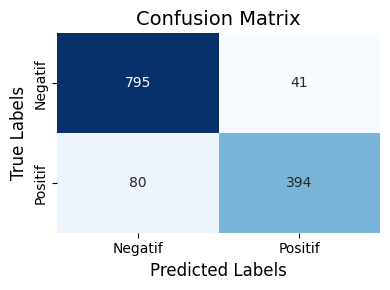

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Pilih kernel yang ingin ditampilkan confusion matrix-nya
selected_kernel = 'linear'
svm_model_selected = svm_models[selected_kernel]

# Prediksi pada data testing untuk kernel yang dipilih
y_test_pred_selected = svm_model_selected.predict(x_test_array)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_selected)

# Visualisasi confusion matrix
plt.figure(figsize=(4, 3))  # Ukuran plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Penggalian Opini

In [ ]:
import numpy as np
selected_kernel = 'linear'
svm_model_selected = svm_models[selected_kernel]
# Ambil koefisien fitur
feature_weights = svm_model_selected.coef_[0]

In [ ]:
# X_train berasal dari TfidfVectorizer
feature_names = tfidf_vect.get_feature_names_out()  # Nama fitur (kata-kata)
# Gabungkan nama fitur dengan bobotnya
feature_importance = sorted(zip(feature_names, feature_weights), key=lambda x: x[1], reverse=True)
# Tampilkan fitur yang paling berkontribusi ke sentimen positif
print("Fitur yang mendukung sentimen positif:")
for word, weight in feature_importance[:20]:
    print(f"{word}: {weight:.4f}")
# Tampilkan fitur yang mendukung sentimen negatif
print("\nFitur yang mendukung sentimen negatif:")
for word, weight in feature_importance[-20:]:
    print(f"{word}: {weight:.4f}")

Fitur yang mendukung sentimen positif:
bagus: 2.6291
mantap: 2.4887
baik: 2.2106
bantu: 2.1591
saran: 2.0867
ok: 2.0715
tepat: 1.8811
good: 1.8793
sukses: 1.8596
murah: 1.7907
list: 1.7405
jangkau: 1.7174
ramah: 1.6844
nyaman: 1.6647
gacorkan: 1.6133
tingkat: 1.5135
joss: 1.5123
keren: 1.5097
puas: 1.4748
maju: 1.4530

Fitur yang mendukung sentimen negatif:
up: -1.4044
update: -1.4630
otomatis: -1.4641
sulit: -1.4735
kenapa: -1.4913
jelek: -1.5155
bangkrut: -1.5171
loading: -1.5678
mahal: -1.6464
lama: -1.6760
saldo: -1.6812
susah: -1.7302
parah: -1.7519
sistem: -1.8066
hilang: -1.8315
buruk: -1.9541
tolong: -1.9825
turun: -2.0282
rugi: -2.4233
tidak: -4.6110


# Penyimpanan Model Terbaik

In [ ]:
import pickle

selected_kernel = 'linear'
with open(f"svm_model_{selected_kernel}.pkl", 'wb') as file:
    pickle.dump(svm_models[selected_kernel], file)

print("Model berhasil disimpan.")

Model berhasil disimpan.
